In [1]:
from pyspark.sql import SQLContext
from pyspark import SparkContext
sc = SparkContext()
sqlContext = SQLContext(sc)

In [2]:
df = sqlContext.read.load('file:///home/vlad/Documents/github/my_github_repository/coursera/big-data/4-big-data-machine-learning/notebooks/daily_weather.csv', 
                          format='com.databricks.spark.csv', 
                          header='true',inferSchema='true')
df.columns

['number',
 'air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am',
 'relative_humidity_9am',
 'relative_humidity_3pm']

In [3]:
df.printSchema()

root
 |-- number: integer (nullable = true)
 |-- air_pressure_9am: double (nullable = true)
 |-- air_temp_9am: double (nullable = true)
 |-- avg_wind_direction_9am: double (nullable = true)
 |-- avg_wind_speed_9am: double (nullable = true)
 |-- max_wind_direction_9am: double (nullable = true)
 |-- max_wind_speed_9am: double (nullable = true)
 |-- rain_accumulation_9am: double (nullable = true)
 |-- rain_duration_9am: double (nullable = true)
 |-- relative_humidity_9am: double (nullable = true)
 |-- relative_humidity_3pm: double (nullable = true)



**1. What is the maximum of the average wind speed measurements at 9am (to 2 decimal places)?**

In [4]:
df.describe('avg_wind_speed_9am').show()

+-------+------------------+
|summary|avg_wind_speed_9am|
+-------+------------------+
|  count|              1092|
|   mean|  5.50828424225493|
| stddev|4.5528134655317185|
|    min|  0.69345139999974|
|    max|23.554978199999763|
+-------+------------------+



**2. How many rows containing rain accumulation at 9am measurements have missing values?**

In [5]:
df.count() - df.na.drop(subset=['rain_accumulation_9am']).count()

6

**3. What is the correlation between the relative humidity at 9am and at 3pm (to 2 decimal places, and without removing or imputing missing values)?**

In [6]:
df.stat.corr("relative_humidity_9am", "relative_humidity_3pm")

0.8830741909793918

**4. If the histogram for air temperature at 9am has 50 bins, what is the number of elements in the bin with the most elements (without removing or imputing missing values)?**

In [7]:
df.withColumn("bins", df['air_temp_9am']).groupBy("bins").count().show()

+------------------+-----+
|              bins|count|
+------------------+-----+
| 76.74220081626338|    1|
| 42.70311604796972|    1|
|49.567999999999316|    1|
| 78.31400000000238|    1|
| 45.28400000000439|    1|
| 73.42994491349555|    1|
| 68.89999999999779|    1|
| 69.77771706420214|    1|
| 77.36000000000254|    1|
| 57.07364499017384|    1|
| 58.40599999999907|    1|
| 66.93800000000249|    1|
| 86.34200000000483|    1|
| 53.88800000000389|    1|
| 68.41400000000236|    1|
| 79.91600000000203|    1|
| 66.63978421377365|    1|
| 66.34400000000407|    1|
| 78.02312025759346|    1|
| 70.10600000000429|    1|
+------------------+-----+
only showing top 20 rows



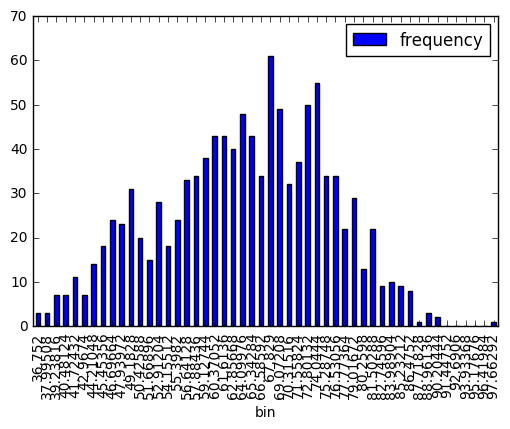

In [8]:
import pandas as pd
%matplotlib inline
hist = df.select('air_temp_9am').rdd.flatMap(lambda x: x).histogram(50)
pd.DataFrame(zip(list(hist)[0],list(hist)[1]),columns=['bin','frequency']).set_index('bin').plot(kind='bar')

** 5. What is the approximate maximum max_wind_direction_9am when the maximum max_wind_speed_9am occurs? **

In [9]:
print df.agg({"max_wind_speed_9am": "max"}).collect()[0]['max(max_wind_speed_9am)'] 

from pyspark.sql.functions import max

max_val = df.agg(max(df.max_wind_speed_9am)).first()[0]
print max_val

29.8407796
29.8407796


In [10]:
df.filter(df.max_wind_speed_9am > max_val-0.000001).collect()[0]['max_wind_direction_9am']

67.9999999999999